<a href="https://colab.research.google.com/github/LeCache/LeCache/blob/main/copia_estefania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/cielo/blob/main/revision_bibloografica/c_2_geron/5_estefania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Video de apoyo a la lectura interactiva y experimental de este cuaderno]()  

Recuerde que la segunda parte de su exposición debe ser la práctica de implementación o de codificación de los conceptos y metodologías presentadas en la teoría leída. 

# Chapter 2 Geron

Páginas 117 a 130. 

### Temas a presentar

* Fine-Tune your model (Afinamiento de modelos con grilla de hiperparámetros)  
  * grid search (cuagrícula de búsqueda)  
  * Randomized search (Búsqueda aleatoria)  
  * Ensemble methods 
  * Analyze the best model and their errors 

## Download the Data

In [134]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def carga_datos():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

datos = carga_datos()

- El módulo **pathlib** es un componente importante de la biblioteca estándar de Python que nos permite manipular rutas de sistemas de archivos de forma rápida en cualquier sistema operativo- con módulo *path*.
- El módulo **tarfile** proporciona acceso de lectura y escritura a archivos de tar.
- El módulo **urllib.request** proporciona una interfaz de programación para usar recursos de Internet identificados por URLs.


## Look Data Structure

In [135]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


En el dataframe observamos 10 atributos que correspondern a la informaación de los distritos.

In [136]:
datos.columns
datos.columns = ['longitud', 'latitud', 'edad_promedio_casa', 'total_espacios', 'total_habitaciones','poblacion','hogares','ingreso_promedio', 'valor_promedio_casa','cercania_oceano']
datos.columns

Index(['longitud', 'latitud', 'edad_promedio_casa', 'total_espacios',
       'total_habitaciones', 'poblacion', 'hogares', 'ingreso_promedio',
       'valor_promedio_casa', 'cercania_oceano'],
      dtype='object')

In [137]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitud             20640 non-null  float64
 1   latitud              20640 non-null  float64
 2   edad_promedio_casa   20640 non-null  float64
 3   total_espacios       20640 non-null  float64
 4   total_habitaciones   20433 non-null  float64
 5   poblacion            20640 non-null  float64
 6   hogares              20640 non-null  float64
 7   ingreso_promedio     20640 non-null  float64
 8   valor_promedio_casa  20640 non-null  float64
 9   cercania_oceano      20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- cada uno de los atributos posee 20 640 datos a excepción del total_habitaciones. 
- Nueve de los atributos poseen datos tipo numércios décimales o float y uno tipo object o de texto, miremos.

In [138]:
datos["cercania_oceano"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: cercania_oceano, dtype: int64

Muestra las 5 categorias de las que se conforma la variable cercania_oceano

In [139]:
datos.describe()

,longitud,latitud,edad_promedio_casa,total_espacios,total_habitaciones,poblacion,hogares,ingreso_promedio,valor_promedio_casa
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Observamos:
- la cantidad de datos en cada variable 20640 a excepción de total_habitaciones con 20433.
- la media, como el valor promedio de las casas es de 206855.81.
- la desviación estandard que muestra la dispersión de los datos.
- los respectivos cuartiles que agrupa a los datos en cuartos porcentuales y les asigna una cantida tope. .


<function matplotlib.pyplot.show(*args, **kw)>

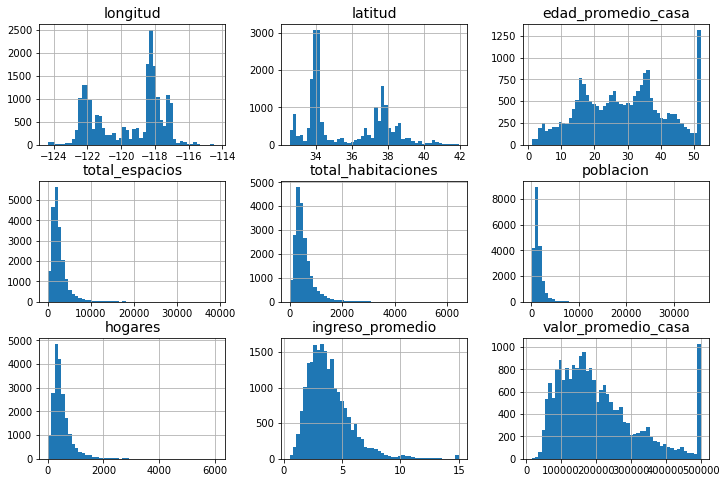

In [140]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
datos.hist(bins=50, figsize=(12,8))
plt.show

- El valor del ingreso promedio se debe multiplicar por $10.000 

## Create a Test Set

In [141]:
import numpy as np

def baraja_datos(data, test_ratio):
  baraja_indices = np.random.permutation(len(data))
  tamano_test_set = int(len(data)*test_ratio)
  test_indices = baraja_indices[:tamano_test_set]
  train_indices = baraja_indices[tamano_test_set:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [142]:
train_set, test_set = baraja_datos(datos, 0.2)
len(train_set)

16512

16512 son los datos (train_set) correspondientes a los datos con los que va a ser entrenado el modelo.

In [143]:
len(test_set)

4128

4128 son los datos (test_set) correspondientes a los datos con los que va a ser evaluado el modelo.

In [144]:
np.random.seed(42)

Semilla insertada para asegurar la paridad de datos en el ejercicio.

In [145]:
from zlib import crc32

def test_set_con_id(identifer, test_ratio):
  return crc32(np.int64(identifer)) < test_ratio * 2**32

def data_dividida_con_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_con_id(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [146]:
datos_con_id = datos.reset_index() # se adiciona una columna 'index' 
train_set, test_set = data_dividida_con_id_hash(datos_con_id, 0.2, "index")

In [147]:
datos_con_id["id"] = datos["longitud"]*1000 + datos["latitud"]
train_set, test_set = data_dividida_con_id_hash(datos_con_id, 0.2, "id")

Veamos si en el conjunto de datos para evaluar el modelo es representativo del total de datos, consultando si los datos "nulos" de la varable total_habitaciones representa el 1% del total (4128).

In [148]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(datos, test_size =0.2, random_state = 42)

In [149]:
test_set["total_habitaciones"].isnull().sum()

44

Efectivamente, 44 es, aproximadamente, el 1% del total de datos del conjunto de datos de evalución. La muestra parece ser representiva.


Estratifiquemos los datos de evaluación o test_set cortando a la densidad representativa de la variable ingreso promedio asegurando una distribución binomial. 

In [150]:
datos["income_cat"] = pd.cut(datos["ingreso_promedio"],
                             bins = [0., 1.5,3.0, 4.5, 6., np.inf],
                             labels =[1,2,3,4,5]) # Cortamos la distribución para hacerla binomial hasta el rango 6.

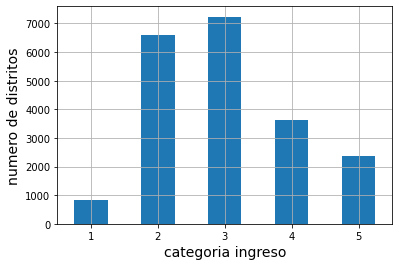

In [151]:
datos["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("categoria ingreso")
plt.ylabel("numero de distritos")
plt.show()

Observamos 5 categorias de ingreso promedio (recuerde multiplicar x 10 000) relacionados al numero de distritos. Decenas de miles de dolares. Veamos qué porcentaje les es asignado según el trato a los datos: datos, test_set y datos_estratificados.

In [152]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(datos, datos["income_cat"]):
    strat_train_set_n = datos.iloc[train_index]
    strat_test_set_n = datos.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [153]:
test_set.head()

,longitud,latitud,edad_promedio_casa,total_espacios,total_habitaciones,poblacion,hogares,ingreso_promedio,valor_promedio_casa,cercania_oceano
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN


In [154]:
strat_train_set, strat_test_set = strat_splits[0]

In [155]:
strat_train_set, strat_test_set = train_test_split(
    datos, test_size=0.2, stratify=datos["income_cat"], random_state=42)

In [156]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)*100 # stratified

3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: income_cat, dtype: float64

In [157]:
datos["income_cat"].value_counts() / len(datos)*(100) # Overall

3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64

In [158]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(datos, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(datos),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),}).sort_index()
compare_props.index.name = "Income Category"
 

In [159]:
print((compare_props*100).round(2))

                 Overall %  Stratified %  Random %
Income Category                                   
1                     3.98          4.00      4.24
2                    31.88         31.88     30.74
3                    35.06         35.05     34.52
4                    17.63         17.64     18.41
5                    11.44         11.43     12.09


Vemos que el procentaje de datos estratificados del conjunto de evaluación o test_set; corresponden, de manera similar, a los porcentajes de los datos en su totalidad en cada categoría.

In [160]:
for set_ in (strat_train_set, strat_test_set):
  set_ .drop("income_cat", axis=1, inplace = True)
  

Quitamos la categoria "income cat" de los datos de entrenamiento y de evaluación.